In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
digits = datasets.load_digits()

In [23]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

In [25]:
X = digits.data
y = digits.target

In [26]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [27]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
model = KNeighborsClassifier(n_neighbors =3) 
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9861111111111112

Text(0.5, 1.0, 'Test-Train data accuracy')

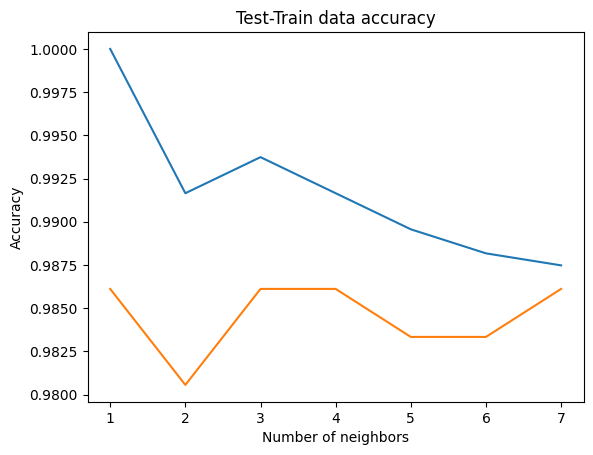

In [45]:
x,y =[],[]
for i in range(1,8):
    model = KNeighborsClassifier(n_neighbors =i) 
    model.fit(X_train,y_train)
    x.append(model.score(X_train,y_train))
    y.append(model.score(X_test,y_test))
plt.plot(range(1,8),x)
plt.plot(range(1,8),y)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Test-Train data accuracy')

In [46]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      1.00      0.97        47
           2       1.00      1.00      1.00        41
           3       0.97      0.97      0.97        35
           4       0.97      0.97      0.97        38
           5       0.94      0.97      0.95        32
           6       0.97      1.00      0.99        34
           7       0.94      1.00      0.97        32
           8       0.97      0.88      0.92        33
           9       0.97      0.88      0.92        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [47]:
#this is the better.
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.99        35
           4       1.00      0.95      0.97        38
           5       0.94      0.97      0.95        32
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        32
           8       0.94      0.94      0.94        33
           9       0.98      0.98      0.98        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [48]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.80      0.77      0.78        47
           2       0.93      0.95      0.94        41
           3       0.88      0.83      0.85        35
           4       0.89      0.84      0.86        38
           5       0.94      0.94      0.94        32
           6       0.94      1.00      0.97        34
           7       0.89      0.97      0.93        32
           8       0.76      0.76      0.76        33
           9       0.86      0.90      0.88        41

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.88      0.88      0.88       360



we can use anyof these as they all working really good but the rbf one is working really great compare to the other two as it has highest accuracy of 0.98 so close to 1. The worst one is sigmoid as it is understandable.

In [49]:
bayes = GaussianNB()
bayes.fit(X_train,y_train)
y_pred = bayes.predict(X_test)

In [50]:
confusion_matrix(y_test,y_pred)

array([[26,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  2,  0,  6,  1],
       [ 0,  1, 32,  0,  1,  0,  0,  0,  7,  0],
       [ 0,  0,  0, 23,  0,  2,  0,  2,  8,  0],
       [ 0,  0,  0,  0, 32,  0,  1,  4,  1,  0],
       [ 0,  0,  0,  1,  0, 30,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  1,  0,  0,  0,  2,  0,  2, 28,  0],
       [ 1,  4,  0,  3,  0,  1,  0,  1,  4, 27]])

<AxesSubplot: >

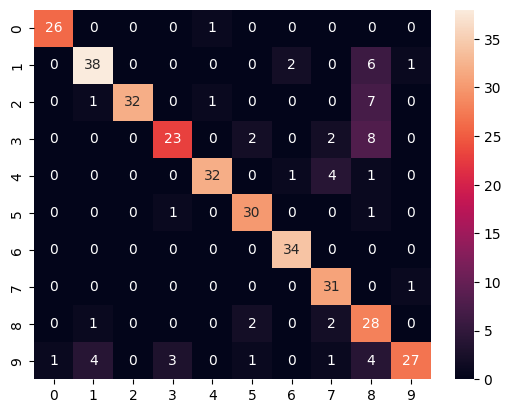

In [52]:

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [60]:
a= []
a.append

model
svm
bayes


In [64]:
x = ['model','svm','bayes']
y = [0.9861,0.88055,0.8361]

In [63]:
bayes.score(X_test,y_test)

0.8361111111111111

<BarContainer object of 3 artists>

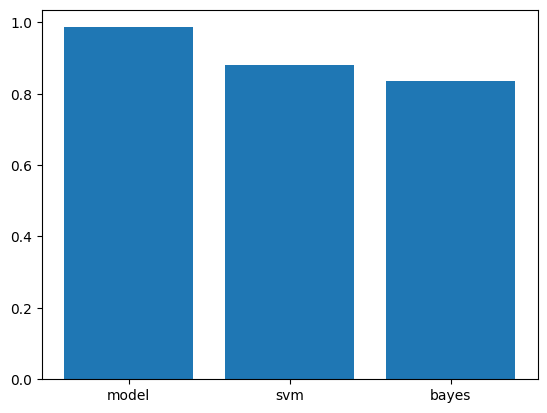

In [66]:
plt.bar(x,y)

In [67]:
 df = pd.read_csv('gapminder.csv')

In [69]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [73]:
x = df['fertility']
y = df['life']
regression = LinearRegression()
regression.fit(x[:,None],y)
print(regression.score(x[:,None],y))

0.6192442167740038


/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_3369/1130071426.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:,None],y)
/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_3369/1130071426.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:,None],y))


/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_3369/1860573298.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig,ax = plt.plot(x,y,'bo',x,regression.predict(x[:, None]), '-k')


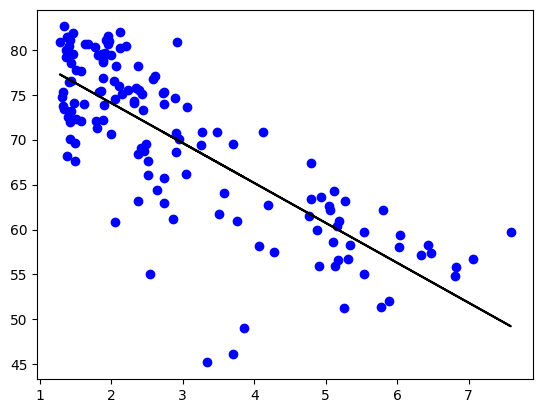

In [74]:
fig,ax = plt.plot(x,y,'bo',x,regression.predict(x[:, None]), '-k')

In [82]:
x1 = df[["fertility","HIV","CO2","BMI_male","child_mortality","GDP","BMI_female"]]
y1 = df['life']
regression1 = LinearRegression()
regression1.fit(x1,y1)
print(regression1.score(x1,y1))

0.8974995317332959


In [88]:
print(regression.score(x[:,None],y))
print(regression1.score(x1,y1))

0.6192442167740038
0.8974995317332959


/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_3369/1293375536.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:,None],y))


In [85]:
cv1 = cross_val_score(regression, x[:,None],y,cv=5)
cv2 = cross_val_score(regression1, x1,y1,cv=5)
print(cv1,cv2)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561] [0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]


/var/folders/nz/lxbhn6753l789bw2zk24yntm0000gn/T/ipykernel_3369/1249240522.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cv1 = cross_val_score(regression, x[:,None],y,cv=5)


In [89]:
# load creditcard data
df =pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [95]:
frauds  = df.loc[df['Class'] == 1]
non_frauds  =df.loc[df['Class'] == 0]


In [96]:
frauds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


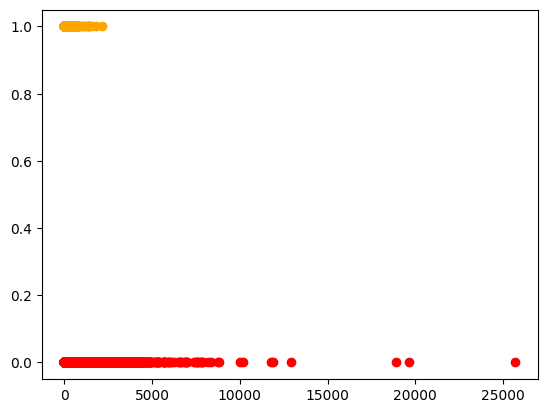

In [98]:
plt.plot(frauds.Amount,frauds.Class, 'o', color= "orange", label = "Frauds")
plt.plot(non_frauds.Amount,non_frauds.Class, 'o', color= "red", label = "Frauds")

<AxesSubplot: >

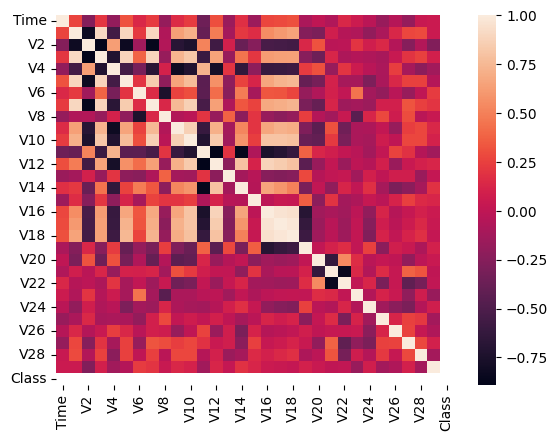

In [100]:
sns.heatmap(frauds.corr())

In [101]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [103]:
x

0      2.73
1      6.43
2      2.24
3      1.40
4      1.96
       ... 
134    2.11
135    2.46
136    1.86
137    5.88
138    3.85
Name: fertility, Length: 139, dtype: float64

In [104]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [105]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100110,67417.0,1.134290,-1.239831,1.508834,-0.588736,-1.626656,1.088287,-1.800998,0.614111,0.160328,...,0.030347,0.485218,1.480539,-0.083989,-0.242771,0.184252,0.053566,0.095135,0.018545,39.80
184174,126128.0,-1.075683,0.618357,-0.335888,-1.185735,2.650528,-0.871717,1.652917,-0.261020,-1.509075,...,0.110028,0.334264,0.742553,-0.760552,0.201012,1.676036,0.745291,-0.147639,0.007571,18.00
82425,59395.0,-3.122273,-1.178240,0.041551,4.998084,2.083517,-0.653028,0.460746,-0.196476,-1.648917,...,-1.275203,-0.550975,0.992904,2.361471,0.039260,-0.333510,0.368804,1.549763,-0.128518,34.15
260533,159600.0,-0.048307,0.701463,0.329696,-0.668234,0.417620,-0.805397,0.824796,0.006510,-0.192461,...,-0.068660,-0.201106,-0.485540,0.098449,-0.010557,-0.568705,0.123229,0.239098,0.086938,5.99
255586,157297.0,2.357926,-0.894923,-2.759405,-2.872970,-0.120626,-1.951684,0.261078,-0.598442,0.756737,...,-0.737387,-0.244117,-0.046158,-0.111916,-0.748978,0.616896,-0.545637,-0.003412,-0.080282,4.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187517,127569.0,2.015895,-1.322112,-0.982968,-1.216283,-0.517036,0.609874,-1.124576,0.141415,-0.165240,...,0.266904,0.443061,1.088417,-0.049178,-0.300979,-0.105712,-0.062090,-0.004394,-0.041597,103.00
266547,162376.0,2.030090,-0.430618,-0.883916,-0.007043,0.007531,0.416659,-0.654809,0.147247,1.091339,...,-0.159458,0.184563,0.681260,-0.038130,-1.430855,-0.004074,-0.173651,0.030903,-0.060084,11.74
59560,48894.0,1.125445,-0.241987,0.716803,0.260720,-0.431560,0.534352,-0.648685,0.304039,0.307888,...,-0.028178,0.046010,0.075277,-0.029465,-0.635874,0.122821,0.443718,-0.001803,0.010776,35.89
6810,8589.0,-1.326354,0.565455,0.959708,0.336732,-2.643078,1.066457,0.431728,0.807786,1.601497,...,-0.249586,-0.157786,-0.183033,0.434411,0.086649,-0.841801,0.927686,-0.136442,-0.068602,348.85


In [106]:
logi_re = LogisticRegression()

In [108]:
logi_re.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
print(logi_re.best_score_)

AttributeError: 'LogisticRegression' object has no attribute 'best_score_'

In [111]:
y_pred = logi_re.predict(X_test)

In [116]:
from sklearn.metrics import classification_report
con_mat = classification_report(y_test,y_pred)

In [117]:
con_mat

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     71093\n           1       0.68      0.75      0.71       109\n\n    accuracy                           1.00     71202\n   macro avg       0.84      0.88      0.86     71202\nweighted avg       1.00      1.00      1.00     71202\n'

In [121]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred)

In [122]:
c_matrix

array([[71054,    39],
       [   27,    82]])

<AxesSubplot: >

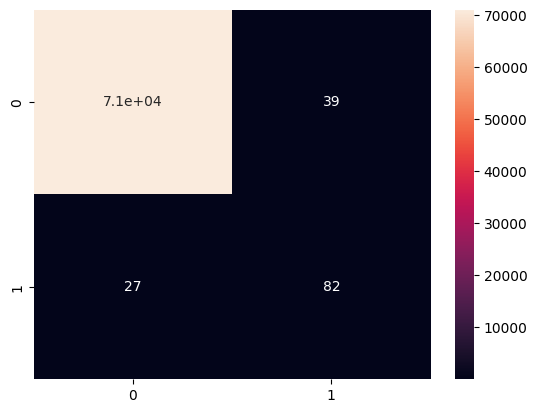

In [123]:
sns.heatmap(c_matrix,annot=True)